In [1]:
import sys
from pathlib import Path

# Add the project root to Python path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

from src.utils.system_info import get_device_info

devices = get_device_info()
print(devices["cpu"])   # e.g., "AMD Ryzen 5 3600 6-Core Processor"
print(devices["gpu"])   # e.g., "NVIDIA GeForce GTX 750 Ti" or "No GPU detected"

AMD Ryzen 5 3600 6-Core Processor
NVIDIA GeForce GTX 750 Ti


/mnt/g/GitHub/FFM/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:283: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX 750 Ti which is of cuda capability 5.0.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (7.0) - (12.0)
    
  warnings.warn(
/mnt/g/GitHub/FFM/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:304: UserWarning: 
    Please install PyTorch with a following CUDA
    configurations:  12.6 following instructions at
    https://pytorch.org/get-started/locally/
    
  warnings.warn(matched_cuda_warn.format(matched_arches))
/mnt/g/GitHub/FFM/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:326: UserWarning: 
NVIDIA GeForce GTX 750 Ti with CUDA capability sm_50 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_70 sm_75 sm_80 sm_86 sm_90 sm_100 sm_120.
If you want to use the NVIDIA GeForce GTX 750 Ti GPU with PyTorch, please check the instructions at h

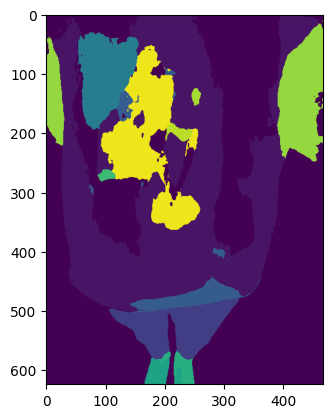

In [4]:
import time
start_time = time.perf_counter()

import transformers
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("sayeed99/segformer-b3-fashion")
model = AutoModelForSemanticSegmentation.from_pretrained("sayeed99/segformer-b3-fashion")

# url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
img_path = "/mnt/g/Data/DeepFashion2/deepfashion2_original_images/test/test/image/000001.jpg"

# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(img_path)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)


In [5]:
# Return runtime
end_time = time.perf_counter()
elapsed_time = end_time - start_time

print(f"The notebook took {elapsed_time:.4f} seconds to run.")

The notebook took 6.1845 seconds to run.
